In [157]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, MaxAbsScaler, Normalizer

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.svm import SVC
# import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import shap
import conorm
import warnings
warnings.filterwarnings("ignore")

In [156]:
train_df = pd.read_csv('normalized_train_set_294_common.tsv', sep='\t')

test_df = pd.read_csv('normalized_test_table_with_names_294_common.tsv', sep='\t')

df_3 = pd.read_csv('normalized_final_table_with_names_UNIQ.tsv', sep='\t')
df_4= pd.read_csv('normalized_train_set_UNIQ_ALL.tsv', sep='\t')

In [158]:
train_df

,SRR11820311,SRR11820312,SRR11820313,SRR11820314,SRR11820315,SRR11820316,SRR11820317,SRR11820318,SRR11820319,SRR11820320,...,SRR15975159,SRR15975160,SRR15975161,SRR15975162,SRR15975163,SRR15975164,SRR15975165,SRR15975166,SRR15975167,SRR15975168
-_ucaggcucaguccccucc,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-_ucaggcucaguccccuccau,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-_ucccuguccuccaggagcucac,0.000000e+00,4.858300e+04,1.093117e+05,1.417004e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.740891e+05,...,2.024291e+05,9.716599e+04,0.000000e+00,0.000000e+00,7.692308e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-_uguaaacauccuugacug,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-let-7a-5p,3.655870e+06,6.647773e+06,1.123077e+07,2.397976e+07,4.902834e+06,4.995951e+06,4.659919e+06,6.724696e+06,4.433198e+06,1.152632e+07,...,2.024696e+07,8.627530e+06,5.595142e+06,7.230769e+06,2.547773e+07,1.075709e+07,4.461538e+06,8.340081e+06,7.623482e+06,6.433198e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-942-5p,5.465587e+05,4.453441e+05,2.186235e+05,5.263158e+04,2.712551e+05,8.178138e+05,2.024291e+05,2.267206e+05,2.631579e+05,7.692308e+04,...,1.012146e+05,1.255061e+05,4.453441e+04,1.619433e+04,3.238866e+04,4.453441e+04,3.643725e+04,3.643725e+04,1.174089e+05,4.048583e+04
hsa-miR-95-5p,1.336032e+05,4.453441e+05,5.263158e+04,0.000000e+00,2.267206e+05,2.712551e+05,5.263158e+04,9.311741e+04,1.417004e+05,6.072874e+04,...,1.457490e+05,1.700405e+05,1.255061e+05,2.834008e+04,4.858300e+04,2.429150e+04,2.024291e+04,2.429150e+04,1.417004e+05,1.214575e+04
hsa-miR-96-5p,3.927126e+05,4.655870e+05,6.477733e+04,3.643725e+04,8.906883e+04,2.914980e+05,5.668016e+04,1.740891e+05,1.538462e+05,7.287449e+04,...,1.740891e+05,1.740891e+05,1.659919e+05,2.024291e+05,3.238866e+05,1.133603e+05,1.417004e+05,1.619433e+05,1.902834e+05,6.477733e+04
hsa-miR-98-5p,1.376518e+05,1.740891e+05,1.214575e+04,2.834008e+04,2.429150e+04,9.716599e+04,0.000000e+00,2.834008e+04,1.295547e+05,5.263158e+04,...,2.834008e+04,2.834008e+04,2.429150e+04,1.619433e+04,1.619433e+04,2.024291e+04,4.048583e+03,2.024291e+04,5.668016e+04,8.097166e+03


In [159]:
test_df

,scamt1,scamt2,scamt3,scamt4,scamt5,scamt6,scamt7,scamt8,scamt9,scamt10,...,scamt15,scamt16,scamt17,scamt18,scamt19,scamt20,scamt21,scamt22,scamt23,scamt24
-_ucaggcucaguccccucc,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,2.291667e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-_ucaggcucaguccccuccau,0.000000e+00,0.000000e+00,0.0,0.000000e+00,5.000000e+05,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.750000e+05,0.000000e+00,0.000000e+00,0.000000e+00
-_ucccuguccuccaggagcucac,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,3.333333e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-_uguaaacauccuugacug,0.000000e+00,5.833333e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,1.583333e+06,2.416667e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-let-7a-5p,2.797222e+07,3.362500e+07,0.0,2.173611e+07,2.765278e+07,2.020833e+06,2312500.0,5.444444e+06,2.266667e+07,5.486111e+06,...,0.0,0,6.950000e+07,4.934722e+07,3.251389e+07,1.333333e+06,8.125000e+06,2.479167e+06,5.979167e+06,2.118750e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-942-5p,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.666667e+05,0.000000e+00,...,0.0,0,2.500000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-miR-95-5p,0.000000e+00,2.916667e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-miR-96-5p,0.000000e+00,5.833333e+05,0.0,0.000000e+00,3.750000e+05,0.000000e+00,0.0,0.000000e+00,6.666667e+05,2.500000e+05,...,0.0,0,0.000000e+00,2.500000e+05,4.583333e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-miR-98-5p,1.500000e+06,1.916667e+06,0.0,1.041667e+06,6.666667e+05,0.000000e+00,0.0,2.916667e+05,1.166667e+06,0.000000e+00,...,0.0,0,4.708333e+06,4.583333e+06,3.125000e+06,1.666667e+05,5.416667e+05,8.750000e+05,7.916667e+05,1.666667e+06


In [160]:
def preprocessing_data(original_DESeq2, coldata):
    coldata.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
    coldata = coldata[coldata['Sample_type'] != 'MBM']
    coldata = coldata.reset_index(drop=True)
    coldata['Sample_type'] = coldata['Sample_type'].replace({'HDC': 0, 'GBM': 1})
    coldata = coldata.drop(columns=['BioProject'])

    original_DESeq2 = original_DESeq2.T
    original_DESeq2.reset_index(inplace=True)
    bio = pd.merge(original_DESeq2, coldata, on='index')
    bio.rename(columns={'index': 'mirna_id'}, inplace=True)
    return bio

In [161]:
def baseline(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [162]:
coldata = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\coldata.tsv', sep='\t') 
bio = preprocessing_data(train_df, coldata)
bio

,mirna_id,-_ucaggcucaguccccucc,-_ucaggcucaguccccuccau,-_ucccuguccuccaggagcucac,-_uguaaacauccuugacug,hsa-let-7a-5p,hsa-let-7b-5p,hsa-let-7c-5p,hsa-let-7d-5p,hsa-let-7e-5p,...,hsa-miR-92a-1-5p,hsa-miR-92a-2-5p,hsa-miR-92b-5p,hsa-miR-93-5p,hsa-miR-942-5p,hsa-miR-95-5p,hsa-miR-96-5p,hsa-miR-98-5p,hsa-miR-99a-5p,Sample_type
0,SRR11820311,0.0,0.0,0.000000,0.0,3.655870e+06,2.692308e+06,2.323887e+06,2.327935e+06,5.991903e+05,...,1.096356e+07,1.096356e+07,1.060729e+06,3.757085e+06,546558.704453,133603.238866,392712.550607,137651.821862,1.789474e+06,0
1,SRR11820312,0.0,0.0,48582.995951,0.0,6.647773e+06,4.538462e+06,2.943320e+06,4.437247e+06,9.271255e+05,...,1.696356e+07,1.695142e+07,8.582996e+05,1.072874e+07,445344.129555,445344.129555,465587.044534,174089.068826,1.607287e+06,0
2,SRR11820313,0.0,0.0,109311.740891,0.0,1.123077e+07,8.000000e+06,5.246964e+06,6.825911e+06,9.190283e+05,...,5.622672e+07,5.621862e+07,2.404858e+06,4.649798e+07,218623.481781,52631.578947,64777.327935,12145.748988,1.331984e+06,0
3,SRR11820314,0.0,0.0,141700.404858,0.0,2.397976e+07,1.466802e+07,9.396761e+06,1.330364e+07,1.489879e+06,...,7.959514e+07,7.959514e+07,2.963563e+06,7.922267e+07,52631.578947,0.000000,36437.246964,28340.080972,3.607287e+06,0
4,SRR11820315,0.0,0.0,0.000000,0.0,4.902834e+06,4.437247e+06,2.651822e+06,1.340081e+06,3.886640e+05,...,1.244130e+07,1.242105e+07,7.004049e+05,5.542510e+06,271255.060729,226720.647773,89068.825911,24291.497976,1.275304e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,SRR15975164,0.0,0.0,0.000000,0.0,1.075709e+07,5.530364e+06,4.076923e+06,2.615385e+06,3.036437e+05,...,1.727530e+07,1.727530e+07,2.380567e+06,6.352227e+06,44534.412955,24291.497976,113360.323887,20242.914980,4.291498e+05,1
243,SRR15975165,0.0,0.0,0.000000,0.0,4.461538e+06,3.125506e+06,2.129555e+06,1.340081e+06,2.145749e+05,...,6.355061e+07,6.355870e+07,9.538462e+06,1.521457e+07,36437.246964,20242.914980,141700.404858,4048.582996,2.307692e+05,1
244,SRR15975166,0.0,0.0,0.000000,0.0,8.340081e+06,3.834008e+06,2.834008e+06,2.449393e+06,2.834008e+05,...,2.861538e+07,2.859919e+07,3.441296e+06,7.898785e+06,36437.246964,24291.497976,161943.319838,20242.914980,4.979757e+05,1
245,SRR15975167,0.0,0.0,0.000000,0.0,7.623482e+06,4.121457e+06,3.165992e+06,2.404858e+06,6.153846e+05,...,1.957895e+07,1.957895e+07,2.765182e+06,7.813765e+06,117408.906883,141700.404858,190283.400810,56680.161943,5.222672e+05,1


# Prediction with direct approach

In [146]:
X = bio.drop(['mirna_id', 'Sample_type'], axis=1) 
y = bio['Sample_type']
X = X.astype(int)
X

,-_ucaggcucaguccccucc,-_ucaggcucaguccccuccau,-_ucccuguccuccaggagcucac,-_uguaaacauccuugacug,hsa-let-7a-5p,hsa-let-7b-5p,hsa-let-7c-5p,hsa-let-7d-5p,hsa-let-7e-5p,hsa-let-7f-5p,...,hsa-miR-9-5p,hsa-miR-92a-1-5p,hsa-miR-92a-2-5p,hsa-miR-92b-5p,hsa-miR-93-5p,hsa-miR-942-5p,hsa-miR-95-5p,hsa-miR-96-5p,hsa-miR-98-5p,hsa-miR-99a-5p
0,0,0,0,0,3655870,2692307,2323886,2327935,599190,834008,...,246963,10963562,10963562,1060728,3757085,546558,133603,392712,137651,1789473
1,0,0,48582,0,6647773,4538461,2943319,4437246,927125,1866396,...,473684,16963562,16951417,858299,10728744,445344,445344,465587,174089,1607287
2,0,0,109311,0,11230769,8000000,5246963,6825910,919028,3012145,...,149797,56226720,56218623,2404858,46497975,218623,52631,64777,12145,1331983
3,0,0,141700,0,23979757,14668016,9396761,13303643,1489878,5882591,...,157894,79595141,79595141,2963562,79222672,52631,0,36437,28340,3607287
4,0,0,0,0,4902834,4437246,2651821,1340080,388663,955465,...,230769,12441295,12421052,700404,5542510,271255,226720,89068,24291,1275303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,0,0,0,10757085,5530364,4076923,2615384,303643,4469635,...,60728,17275303,17275303,2380566,6352226,44534,24291,113360,20242,429149
243,0,0,0,0,4461538,3125506,2129554,1340080,214574,1919028,...,20242,63550607,63558704,9538461,15214574,36437,20242,141700,4048,230769
244,0,0,0,0,8340080,3834008,2834008,2449392,283400,3947368,...,48582,28615384,28599190,3441295,7898785,36437,24291,161943,20242,497975
245,0,0,0,0,7623481,4121457,3165991,2404858,615384,3781376,...,182186,19578947,19578947,2765182,7813765,117408,141700,190283,56680,522267


In [147]:
y

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    1
244    1
245    1
246    1
Name: Sample_type, Length: 247, dtype: int64

In [154]:
baseline(X, y)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.88      0.79      0.83        19

    accuracy                           0.88        50
   macro avg       0.88      0.86      0.87        50
weighted avg       0.88      0.88      0.88        50

[[29  2]
 [ 4 15]]


# Model with selected features

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
 
explainer = shap.Explainer(gbm, X_train)
shap_values = explainer(X_test)

mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)
feature_importance_dict = dict(zip(X_test.columns, mean_abs_shap_values))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
most_important_rnas = [feature for feature, importance in sorted_feature_importance]

file_path = 'C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features_new.txt'

with open(file_path, 'w') as file:
    for rna in most_important_rnas:
        file.write(f"{rna}\n")
print(f"The most important RNAs have been saved to {file_path}.")

The most important RNAs have been saved to C:\Users\Tseh\Documents\Bio_project\Data\Shap_features_new.txt.


In [126]:
with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features_new.txt', 'r') as file:
    lines = file.readlines() 
first_30_lines = [line.strip() for line in lines[:27]]
X_filtered = X[first_30_lines]
baseline(X_filtered, y)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.79      0.79      0.79        19

    accuracy                           0.84        50
   macro avg       0.83      0.83      0.83        50
weighted avg       0.84      0.84      0.84        50



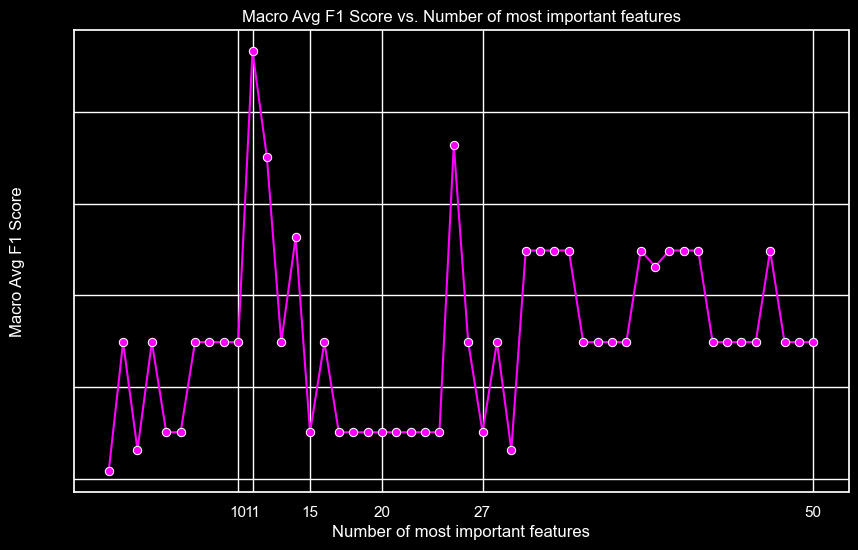

In [127]:
def base(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    return classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features_new.txt', 'r') as file:
    lines = file.readlines()

f1_scores = []
for i in range(1, 51):
    selected_lines = [line.strip() for line in lines[:i]]
    X_filtered = X[selected_lines]
    f1_score = base(X_filtered, y)
    f1_scores.append(f1_score)

    
plt.figure(figsize=(10, 6)) 

sns.set_theme(style="darkgrid", rc={"axes.edgecolor": 'white', 'figure.facecolor': 'black', 'axes.facecolor': 'black'})
sns.lineplot(x=range(1, 51), y=f1_scores, marker='o', color='magenta')

plt.title('Macro Avg F1 Score vs. Number of most important features', color='white')
plt.xlabel('Number of most important features', color='white')
plt.ylabel('Macro Avg F1 Score', color='white')

custom_ticks = [10, 11, 15, 20, 27, 50]
plt.xticks(custom_ticks, color='white')
plt.yticks(color='black')
plt.show()

In [128]:
with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features_new.txt', 'r') as file:
    lines = file.readlines() 
first_30_lines = [line.strip() for line in lines[:11]]
X_filtered = X[first_30_lines]
baseline(X_filtered, y)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.94      0.84      0.89        19

    accuracy                           0.92        50
   macro avg       0.93      0.90      0.91        50
weighted avg       0.92      0.92      0.92        50



In [163]:
X_train = bio.drop(['mirna_id', 'Sample_type'], axis=1) 
X_train = X_train.astype(int)
y_train = bio['Sample_type']

In [164]:
X_test = test_df.T

In [131]:
with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features_new.txt', 'r') as file:
    lines = file.readlines() 
first_11_lines = [line.strip() for line in lines[:11]]
X_filtered_train = X_train[first_11_lines]
X_filtered_test = X_test[first_11_lines]

In [132]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_filtered_train, y_train)

GradientBoostingClassifier(random_state=42)

In [134]:
y_pred = gbm.predict(X_filtered_test)

In [135]:
predictions_list = y_pred.tolist()
print(predictions_list)

[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [166]:
l1 = [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,       1, 1, 1, 1, 1, 1, 1, 1]
l2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1, 1, 1, 1, 1, 1, 1, 1]
l3 = [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,      1, 1, 1, 0, 1, 0, 0, 1]

In [167]:
len(l3)

20

In [155]:
cm = confusion_matrix(l1, l2)
cm

array([[3, 0],
       [9, 8]], dtype=int64)

In [165]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
predictions_list = y_pred.tolist()
print(predictions_list)

[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
